## Hastings Direct Assessment

In [61]:
import pandas as pd

In [155]:
df = pd.read_csv('./DS_Assessment.csv')

In [63]:
def explore(data):
    summaryDf = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summaryDf = summaryDf.reset_index()
    summaryDf['Name'] = summaryDf['index']
    summaryDf['Missing'] = data.isnull().sum().values
    summaryDf['Total'] = data.count().values
    summaryDf['MissPerc'] = (summaryDf['Missing']/data.shape[0])*100
    summaryDf['NumUnique'] = data.nunique().values
    summaryDf['UniqueVals'] = [data[col].unique() for col in data.columns]
    print(summaryDf.head(30))

In [64]:
explore(df)

             index   dtypes            Name  Missing  Total  MissPerc  \
0              Age  float64             Age      483  49517     0.966   
1        Veh_Value  float64       Veh_Value      525  49475     1.050   
2              Tax  float64             Tax      517  49483     1.034   
3            Price  float64           Price      515  49485     1.030   
4      Veh_Mileage  float64     Veh_Mileage      509  49491     1.018   
5     Credit_Score  float64    Credit_Score      497  49503     0.994   
6   License_Length  float64  License_Length      498  49502     0.996   
7             Date   object            Date      497  49503     0.994   
8   Marital_Status   object  Marital_Status      483  49517     0.966   
9     Payment_Type   object    Payment_Type      484  49516     0.968   
10    Veh_Reg_Year  float64    Veh_Reg_Year      488  49512     0.976   
11            Sale    int64            Sale        0  50000     0.000   

    NumUnique                                     

In [65]:
df.head(10)

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Date,Marital_Status,Payment_Type,Veh_Reg_Year,Sale
0,68.234601,4385.559975,10.726928,395.881843,7299.380077,366.105677,8.711803,2016-05-14,M,Installments,2017.0,0
1,32.066145,6246.182948,7.869344,534.441400,5887.218868,306.560408,8.754815,2016-06-30,S,Cash,2015.0,0
2,52.039464,5753.093177,9.112318,472.386504,6327.126420,430.070380,6.942515,2016-10-02,M,Installments,2014.0,0
3,51.918920,5674.321541,11.657723,355.692599,7349.979218,493.840343,9.165431,2016-04-06,S,Cash,2011.0,0
4,28.472248,6674.864994,9.309519,327.209088,5471.606750,416.459533,6.810972,2016-10-14,S,Installments,2013.0,0
5,64.510299,7011.869761,12.885478,450.985258,7655.297440,376.064095,11.386787,2016-10-01,M,Cash,2013.0,0
6,61.594223,6185.473889,13.298141,423.213865,9166.468761,267.728480,8.043216,2016-12-22,M,Cash,2012.0,0
7,42.030555,5850.808973,8.970335,408.629620,5385.025061,356.708034,7.069777,2016-06-18,M,Installments,2015.0,0
8,40.692663,5449.655218,10.828371,456.473931,8675.226107,364.041093,9.715375,2016-03-27,S,Cash,2017.0,0
9,47.976908,5131.914728,9.595796,433.613970,7068.875839,284.350640,8.925822,2016-02-18,M,Installments,2012.0,0


## Exploratory Analysis

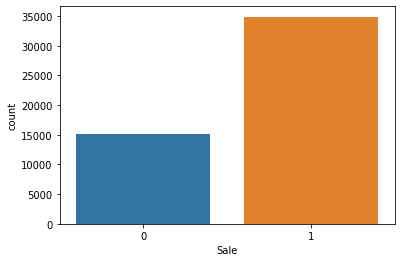

In [66]:
import seaborn as sns

sns.countplot(df.Sale)

Defining Chi Test for categorical features. This method returns the p value, a value in between 0 and 1, with 0 implying there is a strong relationship between the categorical feature in question and 1 implying the opposite.

In [117]:
from scipy import stats
import numpy as np

def chi2_cat_test(df, cat_var):
    vals = df.groupby([cat_var, 'Sale']).Sale.count().unstack().values
    p = stats.chi2_contingency(vals)
    print('p value of', np.round(p[1], 3), 'for variable', cat_var)
    
def chi2_feat_test(df, cat_var, target_var):
    vals = df.groupby([cat_var, target_var]).Sale.count().unstack().values
    p = stats.chi2_contingency(vals)
    print('p value of', np.round(p[1], 3), 'for variable', cat_var)

Correlation plot for continuous variables

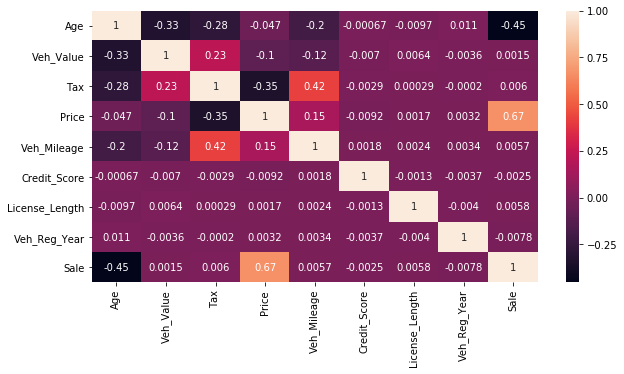

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr, annot=True)

Pair plot for continuous variables from overall dataframe

In [69]:
df_nona = df.dropna()
target_mapping = {
    0: 'No Sale',
    1: 'Sale'
}
df_nona.Sale.replace(target_mapping, inplace=True)
# sns.pairplot(df_nona, hue='Sale')

/Users/shaun/Repos/venv/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [157]:
df.drop(df.loc[df.Date.isnull()].index, inplace=True)

In [70]:
df_nosale = df.loc[df.Sale==0]
df_sale = df.loc[df.Sale==1]

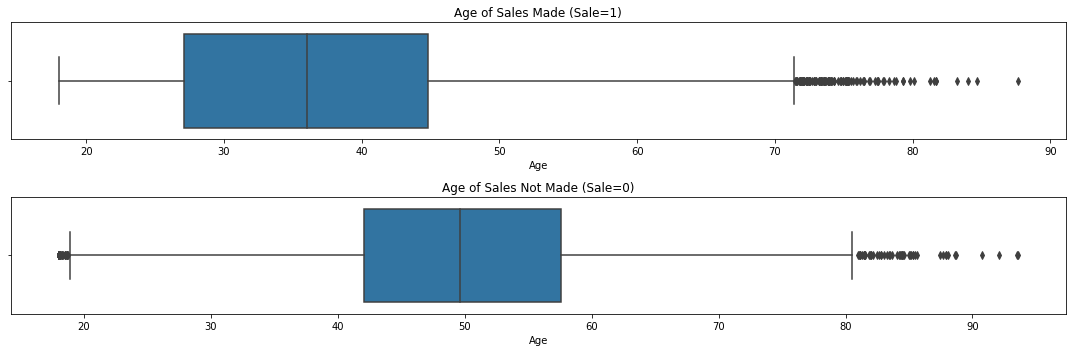

In [71]:
# ages - sales made/not made

fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
ax1 = sns.boxplot(df_sale.Age)
ax1.title.set_text('Age of Sales Made (Sale=1)')
plt.subplot(2,1,2)
ax2 = sns.boxplot(df_nosale.Age)
ax2.title.set_text('Age of Sales Not Made (Sale=0)')
fig.tight_layout()
plt.show()


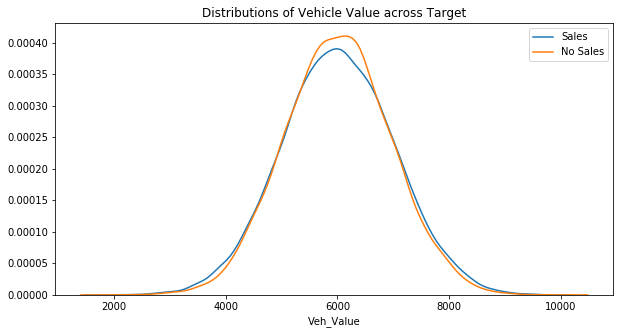

In [72]:
# vehicle value - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Veh_Value.isnull()].Veh_Value, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Veh_Value.isnull()].Veh_Value, hist=False, label='No Sales')
plt.title('Distributions of Vehicle Value across Target')
plt.legend()
plt.show()

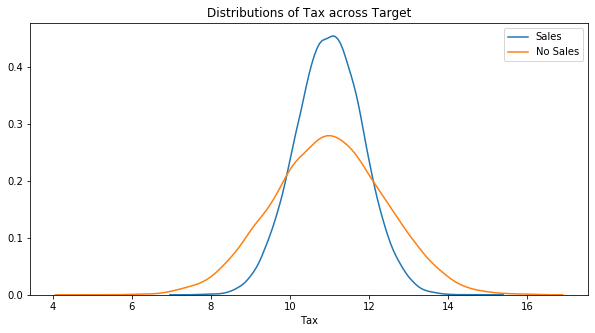

In [73]:
# tax - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Tax.isnull()].Tax, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Tax.isnull()].Tax, hist=False, label='No Sales')
plt.title('Distributions of Tax across Target')
plt.legend()
plt.show()

Taking a further look at tax and vehicle value, especially the relationship between the two.

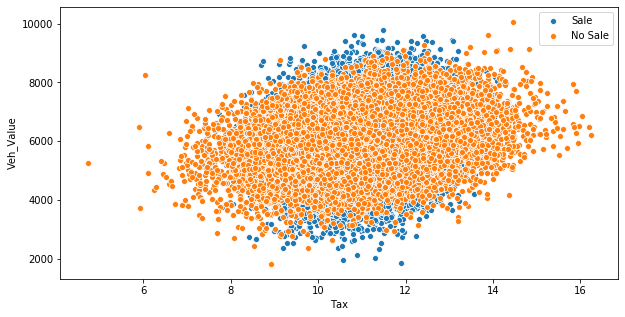

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Tax', y='Veh_Value', data=df_sale, label='Sale')
sns.scatterplot(x='Tax', y='Veh_Value', data=df_nosale, label='No Sale')
plt.legend()
plt.show()

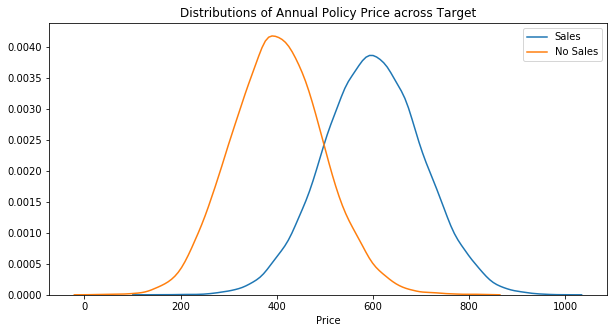

In [75]:
# price - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Price.isnull()].Price, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Price.isnull()].Price, hist=False, label='No Sales')
plt.title('Distributions of Annual Policy Price across Target')
plt.legend()
plt.show()

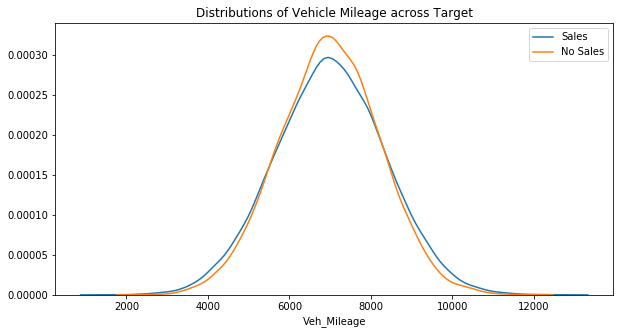

In [76]:
# vehicle mileage - sales made/not made
df_vehmil = df.loc[~df.Veh_Mileage.isnull()]

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_vehmil.loc[df_vehmil.Sale==1].Veh_Mileage, hist=False, label='Sales')
ax2 = sns.distplot(df_vehmil.loc[df_vehmil.Sale==0].Veh_Mileage, hist=False, label='No Sales')
plt.title('Distributions of Vehicle Mileage across Target')
plt.legend()
plt.show()

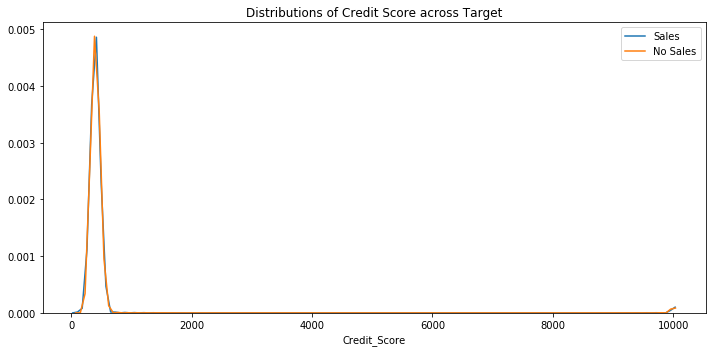

In [77]:
# credit score - sales made/not made

df_cs = df.loc[~df.Credit_Score.isnull()]

fig = plt.figure(figsize=(10,5))
# plt.subplot(2,1,1)
ax1 = sns.distplot(df_cs.loc[df_cs.Sale==1].Credit_Score, hist=False, label='Sales')
ax2 = sns.distplot(df_cs.loc[df_cs.Sale==0].Credit_Score, hist=False, label='No Sales')

# plt.subplot(2,1,2)
# sns.boxplot(x='Credit_Score', y='Sale', data=df_cs)
plt.title('Distributions of Credit Score across Target')
plt.legend()
fig.tight_layout()
plt.show()

Credit Score values are usually in the range 1-1000, therefore we can safely say that what is being seen here on the right of the graph is incorrect (some clients have credit scores of 9999). I couldn't find any information on what ranges Hastings Direct uses to define their credit score values, therefore I will need to pick from the three most popular ones: 
* 0-710 with TransUnion
* 0-999 with Experian
* 0-700 with Equifax.

Firstly I will have a look at those clients with an abnormally high credit score.

In [78]:
df_cs_high = df.loc[df.Credit_Score==9999]
target_mapping = {
    0: 'No Sale',
    1: 'Sale'
}
df_cs_high.Sale.replace(target_mapping, inplace=True)
# sns.pairplot(df_cs_high.dropna().drop('Credit_Score', axis=1), hue='Sale')


/Users/shaun/Repos/venv/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


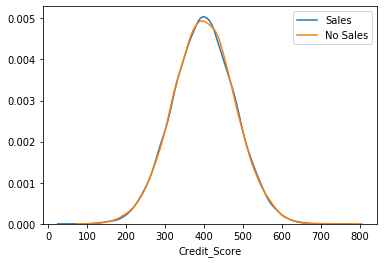

In [79]:
df_cs_nothigh = df.loc[(~df.Credit_Score.isnull()) & (df.Credit_Score != 9999)]
ax1 = sns.distplot(df_cs_nothigh.loc[df_cs_nothigh.Sale==1].Credit_Score, hist=False, label='Sales')
ax2 = sns.distplot(df_cs_nothigh.loc[df_cs_nothigh.Sale==0].Credit_Score, hist=False, label='No Sales')


In [80]:
df_cs_nothigh.Credit_Score.describe()


count    49003.000000
mean       399.322936
std         79.666780
min         55.887237
25%        345.705352
50%        399.247291
75%        453.015683
max        769.338103
Name: Credit_Score, dtype: float64

The max in this dataframe (without those customers with a Credit Score of 9999) is seen to be 769.33. Therefore it is assumed that the credit score range is like that of Experian so all Credit Scores with a value of 9999 are to be set as 999.

In [81]:
df.loc[df.Credit_Score==9999, 'Credit_Score'] = 999


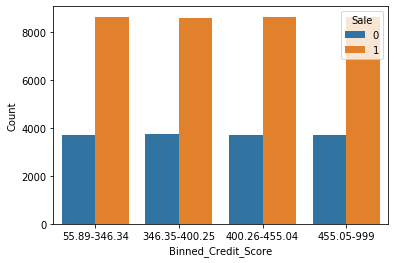

In [83]:
bins = [df.Credit_Score.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = ['55.89-346.34', '346.35-400.25', '400.26-455.04', '455.05-999']
df['Binned_Credit_Score'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels)
cs_df = df.groupby(['Binned_Credit_Score', 'Sale']).size().reset_index(name='Count')
sns.barplot(x='Binned_Credit_Score', y='Count', hue='Sale', data=cs_df)

In [160]:
# date column - split into day, month and year

df.Date = pd.to_datetime(df.Date)
df['Year_Start'] = [d.year for d in df.Date]
df['Month_Start'] = [d.month for d in df.Date]
df['Day_Start'] = [d.day for d in df.Date]
df['DayOfWeek_Start'] = [d.dayofweek for d in df.Date]
df.drop('Date', axis=1, inplace=True)


In [85]:
target_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
df.DayOfWeek_Start.replace(target_mapping, inplace=True)


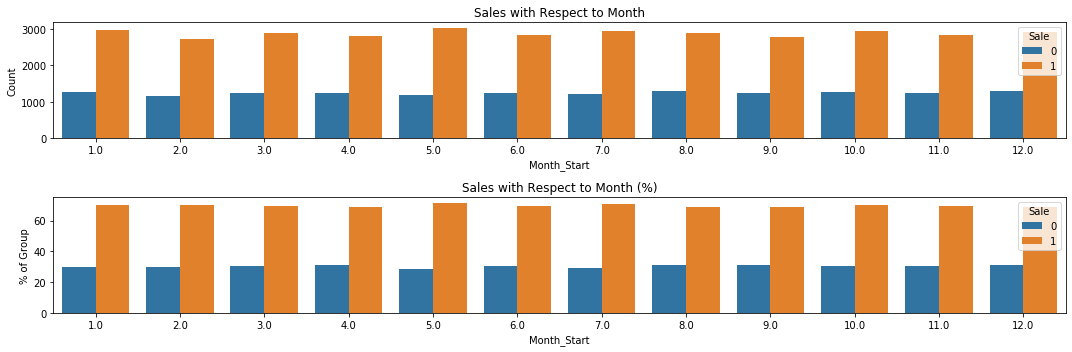

In [86]:
m_gp = df.groupby(['Month_Start', 'Sale']).size().reset_index(name='Count')
fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.barplot(x='Month_Start', y='Count', hue='Sale', data=m_gp)
plt.title('Sales with Respect to Month')

df_temp = df.groupby(['Month_Start', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Month_Start', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Month_Start', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Month (%)')
plt.tight_layout()
plt.show()

In [87]:
chi2_cat_test(df, 'Month_Start')

p value of 0.175 for variable Month_Start


This p-value implies that there is some form of relationship between Month_Start and the Target (Sale)

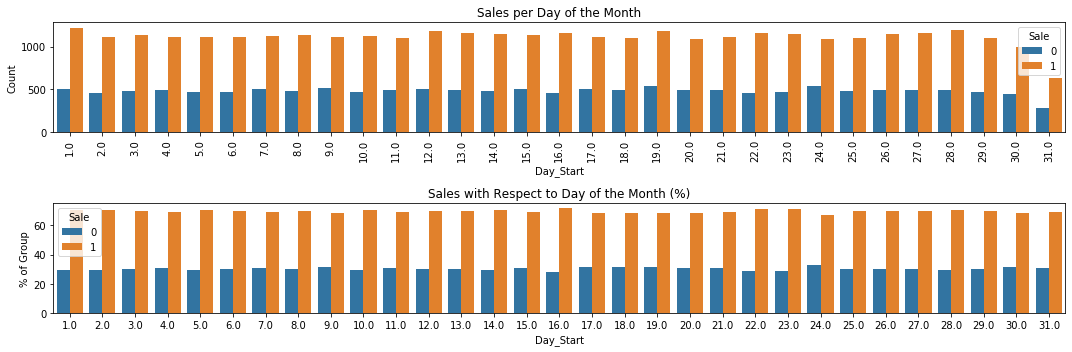

In [88]:
d_gp = df.groupby(['Day_Start', 'Sale']).size().reset_index(name='Count')
fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.barplot(x='Day_Start', y='Count', hue='Sale', data=d_gp)
plt.title('Sales per Day of the Month')
plt.xticks(rotation=90)

df_temp = df.groupby(['Day_Start', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Day_Start', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Day_Start', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Day of the Month (%)')
plt.tight_layout()
plt.show()

In [89]:
chi2_cat_test(df, 'Day_Start')

p value of 0.791 for variable Day_Start


This p-value implies that there is some form of relationship between Day_Start and the Target (Sale), but it is much more independent from the Target than Month_Start.

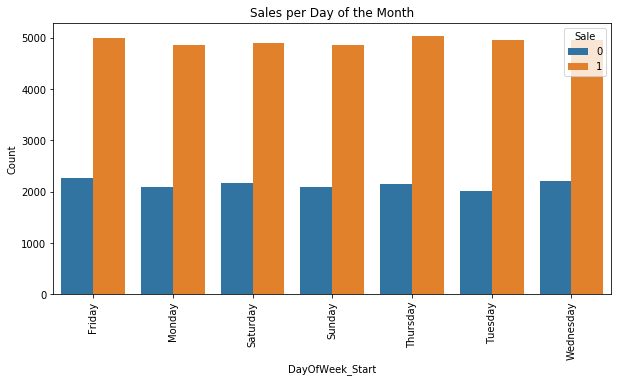

In [90]:
dw_gp = df.groupby(['DayOfWeek_Start', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='DayOfWeek_Start', y='Count', hue='Sale', data=dw_gp)
plt.title('Sales per Day of the Month')
plt.xticks(rotation=90)
plt.show()

In [91]:
chi2_cat_test(df, 'DayOfWeek_Start')

p value of 0.072 for variable DayOfWeek_Start


This p-value implies that there is a strong relationship between DayOfWeek_Start and the Target (Sale)

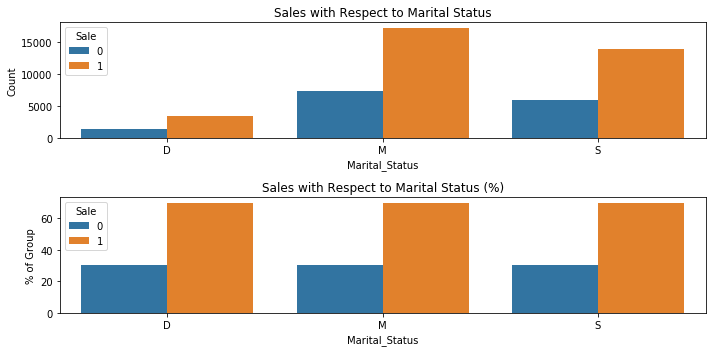

In [92]:
df_ms = df.groupby(['Marital_Status', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Marital_Status', y='Count', hue='Sale', data=df_ms)
plt.title('Sales with Respect to Marital Status')

df_temp = df.groupby(['Marital_Status', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Marital_Status', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Marital_Status', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Marital Status (%)')
plt.tight_layout()
plt.show()

In [93]:
chi2_cat_test(df, 'Marital_Status')

p value of 0.876 for variable Marital_Status


This p-value implies that there is a weak relationship between Marital_Status and the Target (Sale)

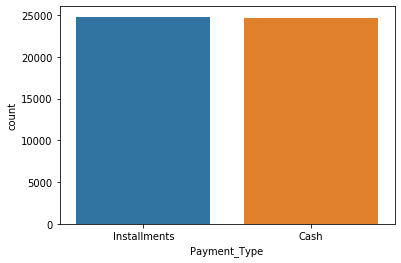

In [94]:
sns.countplot(df.Payment_Type)

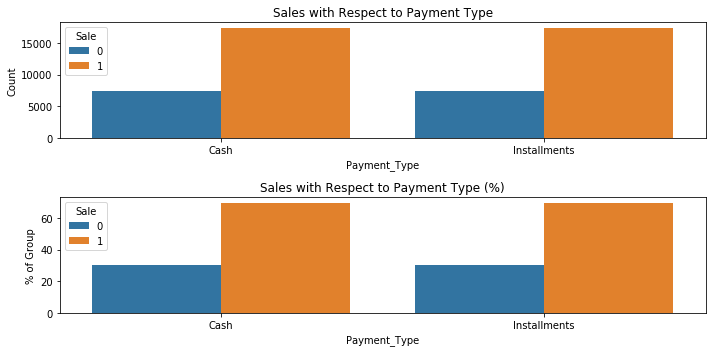

In [95]:
df_ms = df.groupby(['Payment_Type', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Payment_Type', y='Count', hue='Sale', data=df_ms)
plt.title('Sales with Respect to Payment Type')

df_temp = df.groupby(['Payment_Type', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Payment_Type', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Payment_Type', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Payment Type (%)')
plt.tight_layout()
plt.show()


In [96]:
chi2_cat_test(df, 'Payment_Type')

p value of 0.987 for variable Payment_Type


This p-value implies that there is a very weak relationship between Payment_Type and the Target (Sale)

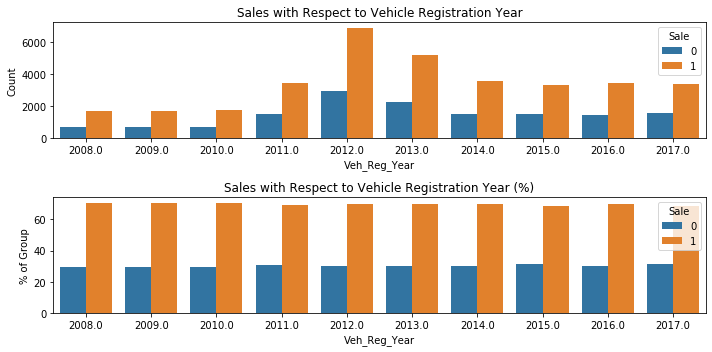

In [97]:
df_vry = df.groupby(['Veh_Reg_Year', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Veh_Reg_Year', y='Count', hue='Sale', data=df_vry)
plt.title('Sales with Respect to Vehicle Registration Year')

df_temp = df.groupby(['Veh_Reg_Year', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Veh_Reg_Year', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Veh_Reg_Year', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Vehicle Registration Year (%)')
plt.tight_layout()
plt.show()


In [98]:
chi2_cat_test(df, 'Veh_Reg_Year')

p value of 0.498 for variable Veh_Reg_Year


## Imputing Missing Values

Since there are missing ages in the dataframe, and a driver can obtain their license at 18, the missing ages are assumed to be 18 + the length of time that the client has had their license.

In [220]:
df.loc[(df.Age.isnull()) & (~df.License_Length.isnull()), 'Age'] = df.License_Length + 18

In [221]:
df.loc[df.Age.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,Sale,Month_Start_sin,Month_Start_cos,Day_Start_sin,Day_Start_cos,DayOfWeek_Start_sin,DayOfWeek_Start_cos,Binned_Veh_Mileage
6758,NaN,4881.336485,9.859124,286.038182,6206.830752,389.128936,NaN,0,0,2016.0,0,-8.660254e-01,5.000000e-01,-0.587785,0.809017,1.224647e-16,-1.0,3
25426,NaN,7624.249367,NaN,597.131067,8587.932947,427.403889,NaN,2,1,2017.0,1,1.224647e-16,-1.000000e+00,0.743145,0.669131,-8.660254e-01,0.5,9
35872,NaN,5901.969928,10.095479,718.265633,5934.635476,260.526738,NaN,0,0,2013.0,1,-1.000000e+00,-1.836970e-16,-0.951057,-0.309017,8.660254e-01,-0.5,3
46227,NaN,5284.644667,9.887684,744.095746,7654.209490,473.584247,NaN,2,1,2014.0,1,5.000000e-01,-8.660254e-01,-0.207912,-0.978148,0.000000e+00,1.0,7


Now binning vehicle values based on quantiles so as to then group by price bin, tax bin and vehicle mileage bin and apply means to missing veh_value entries.

In [222]:
bins = [df.Veh_Mileage.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Veh_Mileage'] = pd.cut(df['Veh_Mileage'], bins=bins, labels=labels)

In [103]:
df

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,Sale,Binned_Credit_Score,Year_Start,Month_Start,Day_Start,DayOfWeek_Start,Binned_Veh_Mileage
0,68.234601,4385.559975,10.726928,395.881843,7299.380077,366.105677,8.711803,M,Installments,2017.0,0,346.35-400.25,2016.0,5.0,14.0,Saturday,3
1,32.066145,6246.182948,7.869344,534.441400,5887.218868,306.560408,8.754815,S,Cash,2015.0,0,55.89-346.34,2016.0,6.0,30.0,Thursday,1
2,52.039464,5753.093177,9.112318,472.386504,6327.126420,430.070380,6.942515,M,Installments,2014.0,0,400.26-455.04,2016.0,10.0,2.0,Sunday,2
3,51.918920,5674.321541,11.657723,355.692599,7349.979218,493.840343,9.165431,S,Cash,2011.0,0,455.05-999,2016.0,4.0,6.0,Wednesday,3
4,28.472248,6674.864994,9.309519,327.209088,5471.606750,416.459533,6.810972,S,Installments,2013.0,0,400.26-455.04,2016.0,10.0,14.0,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35.576055,6818.491888,11.038655,572.744136,7280.563745,533.801541,8.879116,M,Cash,2016.0,1,455.05-999,2016.0,6.0,3.0,Friday,3
49996,44.589409,6717.503898,10.180700,712.178600,5208.248991,479.516773,8.143601,D,Installments,2011.0,1,455.05-999,2016.0,4.0,5.0,Tuesday,1
49997,55.221286,4054.770514,10.819091,648.401713,7616.247167,247.608070,9.737412,M,Installments,2013.0,1,55.89-346.34,2016.0,10.0,12.0,Wednesday,3
49998,33.845486,7418.529620,10.212241,633.407821,5227.626604,345.032627,9.892743,M,Cash,2011.0,1,55.89-346.34,2016.0,9.0,25.0,Sunday,1


In [223]:
bins = [df.Price.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Price'] = pd.cut(df['Price'], bins=bins, labels=labels)

bins = [df.Tax.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Tax'] = pd.cut(df['Tax'], bins=bins, labels=labels)

df_grpd_vv = df.groupby(['Binned_Veh_Mileage', 'Binned_Price', 'Binned_Tax'])['Veh_Value'].mean().reset_index()

for index, row in df_grpd_vv.iterrows():
    df.loc[(df.Veh_Value.isnull())
           & (df.Binned_Veh_Mileage==row.Binned_Veh_Mileage)
           & (df.Binned_Price==row.Binned_Price)
           & (df.Binned_Tax==row.Binned_Tax), 'Veh_Value'] = row['Veh_Value']

In [ ]:
df.loc[df.Veh_Value.isnull()]

In [ ]:
df.loc[df.Tax.isnull()]

In [ ]:
df.columns

In [ ]:
df.loc[df.Day_Start.isnull()]

In [ ]:
df.loc[df.Marital_Status.isnull()]

In [ ]:
df.loc[df.License_Length.isnull()]

In [ ]:
# remove rows that have 3 or more nulls 
# credit score - plotting according to quantiles implies identical sale/no sale -- should be dropped
# marital status, group by age and license length
# important - in the beginning remove rows that have no start date

Creating new col with number of missing values per row.

In [224]:
df['No_Missing'] = df.shape[1] - df.apply(lambda x: x.count(), axis=1)

Removing those rows with 3 (max) missing values.

In [225]:
df.drop(df.loc[df.No_Missing==3].index, inplace=True)

After referring to the split across Sale, payment type is seen to contain 2 unique values that are almost split 50/50. Therefore when imputing missing Payment_Type values in the dataframe, the missing values are filled with the same ratio of what is already there.

In [226]:
df_notnull = df.Payment_Type.isnull()
df_notnull = df_notnull[df_notnull==True].index
len_dfnn = len(df_notnull)
df.loc[df_notnull[0:int(len_dfnn/2)], 'Payment_Type'] = 'Installments'
df.loc[df_notnull[int(len_dfnn/2):len_dfnn], 'Payment_Type'] = 'Cash'

Filling in null values in license length. This is to be dependant on age, with 3 age bins being defined (as usually done when insuring cars). These are:
* The 18-25 group
* 25-65 group
* 65+ group

In [227]:
bins = [17,25,65,95]
labels = ['18-25', '26-65', '66-95']
df['Binned_Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [228]:
df_ba = df.groupby('Binned_Age')['License_Length'].mean().reset_index()

for index, row in df_ba.iterrows():
    df.loc[(df.Binned_Age==row.Binned_Age) & (df.License_Length.isnull()), 'License_Length'] = row.License_Length

In [229]:
df.loc[df.License_Length.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,Month_Start_cos,Day_Start_sin,Day_Start_cos,DayOfWeek_Start_sin,DayOfWeek_Start_cos,Binned_Veh_Mileage,Binned_Price,Binned_Tax,No_Missing,Binned_Age
6758,NaN,4881.336485,9.859124,286.038182,6206.830752,389.128936,NaN,0,0,2016.0,...,5.000000e-01,-0.587785,0.809017,1.224647e-16,-1.0,2,1,1,2,NaN
25426,NaN,7624.249367,NaN,597.131067,8587.932947,427.403889,NaN,2,1,2017.0,...,-1.000000e+00,0.743145,0.669131,-8.660254e-01,0.5,4,3,NaN,4,NaN
35872,NaN,5901.969928,10.095479,718.265633,5934.635476,260.526738,NaN,0,0,2013.0,...,-1.836970e-16,-0.951057,-0.309017,8.660254e-01,-0.5,1,4,1,2,NaN
46227,NaN,5284.644667,9.887684,744.095746,7654.209490,473.584247,NaN,2,1,2014.0,...,-8.660254e-01,-0.207912,-0.978148,0.000000e+00,1.0,3,4,1,2,NaN


In [113]:
df.loc[df.Credit_Score.isnull()]

df.corr()['Credit_Score']

Age               0.002477
Veh_Value        -0.007458
Tax               0.002983
Price            -0.004419
Veh_Mileage       0.004046
Credit_Score      1.000000
License_Length    0.001030
Veh_Reg_Year     -0.002208
Sale             -0.001051
Year_Start             NaN
Month_Start      -0.004288
Day_Start         0.002836
No_Missing       -0.003248
Name: Credit_Score, dtype: float64

In [136]:
chi2_feat_test(df, 'Marital_Status', 'Binned_Credit_Score')

p value of 0.275 for variable Marital_Status


This implies there is a relationship between the binned credit score and marital status.

In [133]:
# df.groupby(['Marital_Status', 'Binned_Credit_Score'])['Credit_Score'].agg('median').reset_index()
Veh_Reg_Year
Binned_Credit_Score
Day_Start
DayOfWeek_Start
Binned_Veh_Mileage
Binned_Age

,Marital_Status,Binned_Credit_Score,Credit_Score
0,D,55.89-346.34,307.441830
1,D,346.35-400.25,375.566290
2,D,400.26-455.04,424.720004
3,D,455.05-999,494.086857
4,M,55.89-346.34,308.715181
5,M,346.35-400.25,374.572705
6,M,400.26-455.04,426.068208
7,M,455.05-999,493.964327
8,S,55.89-346.34,308.609438
9,S,346.35-400.25,375.591282


In [138]:
df.dropna()

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,...,Binned_Credit_Score,Year_Start,Month_Start,Day_Start,DayOfWeek_Start,Binned_Veh_Mileage,Binned_Price,Binned_Tax,No_Missing,Binned_Age
0,68.234601,4385.559975,10.726928,395.881843,7299.380077,366.105677,8.711803,M,Installments,2017.0,...,346.35-400.25,2016.0,5.0,14.0,Saturday,3,1,2,0,66-95
1,32.066145,6246.182948,7.869344,534.441400,5887.218868,306.560408,8.754815,S,Cash,2015.0,...,55.89-346.34,2016.0,6.0,30.0,Thursday,1,2,1,0,26-65
2,52.039464,5753.093177,9.112318,472.386504,6327.126420,430.070380,6.942515,M,Installments,2014.0,...,400.26-455.04,2016.0,10.0,2.0,Sunday,2,2,1,0,26-65
3,51.918920,5674.321541,11.657723,355.692599,7349.979218,493.840343,9.165431,S,Cash,2011.0,...,455.05-999,2016.0,4.0,6.0,Wednesday,3,1,3,0,26-65
4,28.472248,6674.864994,9.309519,327.209088,5471.606750,416.459533,6.810972,S,Installments,2013.0,...,400.26-455.04,2016.0,10.0,14.0,Friday,1,1,1,0,26-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35.576055,6818.491888,11.038655,572.744136,7280.563745,533.801541,8.879116,M,Cash,2016.0,...,455.05-999,2016.0,6.0,3.0,Friday,3,3,3,0,26-65
49996,44.589409,6717.503898,10.180700,712.178600,5208.248991,479.516773,8.143601,D,Installments,2011.0,...,455.05-999,2016.0,4.0,5.0,Tuesday,1,4,1,0,26-65
49997,55.221286,4054.770514,10.819091,648.401713,7616.247167,247.608070,9.737412,M,Installments,2013.0,...,55.89-346.34,2016.0,10.0,12.0,Wednesday,3,4,2,0,26-65
49998,33.845486,7418.529620,10.212241,633.407821,5227.626604,345.032627,9.892743,M,Cash,2011.0,...,55.89-346.34,2016.0,9.0,25.0,Sunday,1,3,1,0,26-65


## Adding Features

In [267]:
# applying bins to Veh_Value/Tax/Price to then be grouped by 

bins = [df.Veh_Value.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Veh_Value'] = pd.cut(df['Veh_Value'], bins=bins, labels=labels)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [268]:
cols = ['Price', 'Veh_Value', 'Tax']
grpd = df.groupby(['Binned_Price', 'Binned_Veh_Value', 'Binned_Tax'])
sums = grpd[cols].sum().add_suffix('_sum')
avgs = grpd[cols].mean().add_suffix('_mean')

grpd_df = pd.concat([sums, avgs], axis=1).reset_index()

cols_add = ['Price_sum', 'Veh_Value_sum', 'Tax_sum', 'Price_mean', 'Veh_Value_mean', 'Tax_mean']

for index, row in grpd_df.iterrows():
    for col in cols_add:
        df.loc[(df['Binned_Price']==row['Binned_Price'])
                         & (df['Binned_Veh_Value']==row['Binned_Veh_Value'])
                         & (df['Binned_Tax']==row['Binned_Tax']), col] = row[col]
    

/Users/shaun/Repos/venv/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/shaun/Repos/venv/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Encoding

In [142]:
df.columns

Index(['Age', 'Veh_Value', 'Tax', 'Price', 'Veh_Mileage', 'Credit_Score',
       'License_Length', 'Marital_Status', 'Payment_Type', 'Veh_Reg_Year',
       'Sale', 'Binned_Credit_Score', 'Year_Start', 'Month_Start', 'Day_Start',
       'DayOfWeek_Start', 'Binned_Veh_Mileage', 'Binned_Price', 'Binned_Tax',
       'No_Missing', 'Binned_Age'],
      dtype='object')

Encoding cyclic variables

In [165]:
df['Month_Start_sin'] = np.sin(df['Month_Start'] * (2. * np.pi / 12))
df['Month_Start_cos'] = np.cos(df['Month_Start'] * (2. * np.pi / 12))

df['Day_Start_sin'] = np.sin(df['Day_Start'] * (2. * np.pi / 30))
df['Day_Start_cos'] = np.cos(df['Day_Start'] * (2. * np.pi / 30))

df['DayOfWeek_Start_sin'] = np.sin(df['DayOfWeek_Start'] * (2. * np.pi / 6))
df['DayOfWeek_Start_cos'] = np.cos(df['DayOfWeek_Start'] * (2. * np.pi / 6))

df.drop(['Month_Start', 'Day_Start', 'DayOfWeek_Start'], axis=1, inplace=True)

In [166]:
df

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,Sale,Year_Start,Month_Start_sin,Month_Start_cos,Day_Start_sin,Day_Start_cos,DayOfWeek_Start_sin,DayOfWeek_Start_cos
0,68.234601,4385.559975,10.726928,395.881843,7299.380077,366.105677,8.711803,M,Installments,2017.0,0,2016,5.000000e-01,-8.660254e-01,2.079117e-01,-0.978148,-8.660254e-01,0.5
1,32.066145,6246.182948,7.869344,534.441400,5887.218868,306.560408,8.754815,S,Cash,2015.0,0,2016,1.224647e-16,-1.000000e+00,-2.449294e-16,1.000000,1.224647e-16,-1.0
2,52.039464,5753.093177,9.112318,472.386504,6327.126420,430.070380,6.942515,M,Installments,2014.0,0,2016,-8.660254e-01,5.000000e-01,4.067366e-01,0.913545,-2.449294e-16,1.0
3,51.918920,5674.321541,11.657723,355.692599,7349.979218,493.840343,9.165431,S,Cash,2011.0,0,2016,8.660254e-01,-5.000000e-01,9.510565e-01,0.309017,8.660254e-01,-0.5
4,28.472248,6674.864994,9.309519,327.209088,5471.606750,416.459533,6.810972,S,Installments,2013.0,0,2016,-8.660254e-01,5.000000e-01,2.079117e-01,-0.978148,-8.660254e-01,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35.576055,6818.491888,11.038655,572.744136,7280.563745,533.801541,8.879116,M,Cash,2016.0,1,2016,1.224647e-16,-1.000000e+00,5.877853e-01,0.809017,-8.660254e-01,-0.5
49996,44.589409,6717.503898,10.180700,712.178600,5208.248991,479.516773,8.143601,D,Installments,2011.0,1,2016,8.660254e-01,-5.000000e-01,8.660254e-01,0.500000,8.660254e-01,0.5
49997,55.221286,4054.770514,10.819091,648.401713,7616.247167,247.608070,9.737412,M,Installments,2013.0,1,2016,-8.660254e-01,5.000000e-01,5.877853e-01,-0.809017,8.660254e-01,-0.5
49998,33.845486,7418.529620,10.212241,633.407821,5227.626604,345.032627,9.892743,M,Cash,2011.0,1,2016,-1.000000e+00,-1.836970e-16,-8.660254e-01,0.500000,-2.449294e-16,1.0


Due to Year_Start only containing 2016, it is dropped. (Contains no added information)

In [167]:
df.drop('Year_Start', inplace=True, axis=1)

Encoding categorical variables

In [181]:
df.loc[df.Marital_Status.isnull(), 'Marital_Status'] = df.Marital_Status.value_counts().index[0]

In [235]:
linspaceArr = np.linspace(0, 1, 11)
bins = [df.Veh_Mileage.quantile(i) for i in linspaceArr]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['Binned_Veh_Mileage'] = pd.cut(df['Veh_Mileage'], bins=bins, labels=labels)

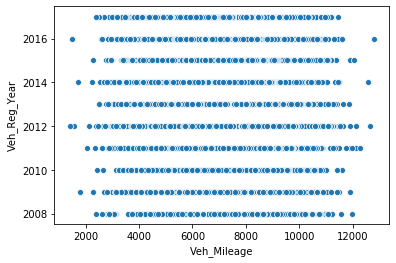

In [206]:
# sns.distplot(df.loc[~df.Veh_Reg_Year.isnull()].Veh_Reg_Year)
sns.scatterplot(x='Veh_Mileage', y='Veh_Reg_Year', data=df)

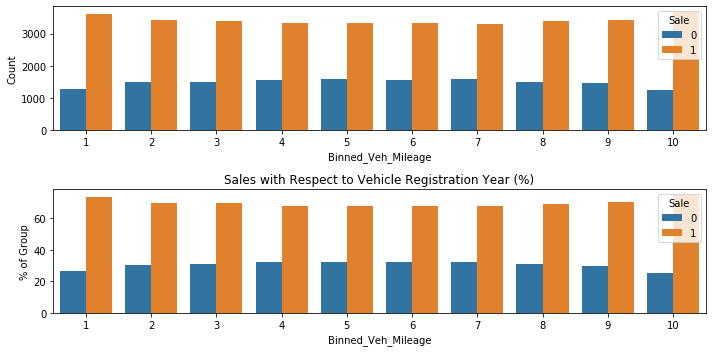

In [245]:
df_bvm = df.groupby(['Binned_Veh_Mileage', 'Sale']).size().reset_index(name='Count')
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.barplot(x='Binned_Veh_Mileage', y='Count', hue='Sale', data=df_bvm)

df_temp = df.groupby(['Binned_Veh_Mileage', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Binned_Veh_Mileage', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Binned_Veh_Mileage', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Vehicle Registration Year (%)')
plt.tight_layout()
plt.show()

In [212]:
target_mapping = {
    'M': 0,
    'D': 1,
    'S': 2
}
df.Marital_Status.replace(target_mapping, inplace=True)

In [216]:
target_mapping = {
    'Installments': 0,
    'Cash': 1
}
df.Payment_Type.replace(target_mapping, inplace=True)

In [260]:
df = df.dropna()

In [261]:
explore(df)

                  index    dtypes                 Name  Missing  Total  \
0                   Age   float64                  Age        0  47058   
1             Veh_Value   float64            Veh_Value        0  47058   
2                   Tax   float64                  Tax        0  47058   
3                 Price   float64                Price        0  47058   
4           Veh_Mileage   float64          Veh_Mileage        0  47058   
5          Credit_Score   float64         Credit_Score        0  47058   
6        License_Length   float64       License_Length        0  47058   
7        Marital_Status     int64       Marital_Status        0  47058   
8          Payment_Type     int64         Payment_Type        0  47058   
9          Veh_Reg_Year   float64         Veh_Reg_Year        0  47058   
10                 Sale     int64                 Sale        0  47058   
11      Month_Start_sin   float64      Month_Start_sin        0  47058   
12      Month_Start_cos   float64     

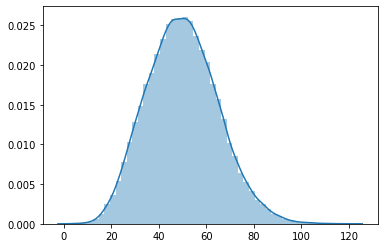

In [262]:
sns.distplot((df.Price/df.Tax).dropna())

## Modelling

Feature importance metric based on [this article](https://academic.oup.com/bioinformatics/article/26/10/1340/193348), using a lightGBM model in Random Forest setting to fit the data. The steps are as follows:
* Create null importance distributions, that is fitting the model on shuffled versions of the target so as to see how the model can make sense of each feature.
* Fit the model again but now on the original data, collecting the feature importances.
* For each feature:
    *  Compute probability of actual importance with respect to the null distribution
    * Compare the actual importance to the mean and max of the null importances

In [273]:
from sklearn.model_selection import train_test_split

target_y = df.Sale
modelling_df = df.drop(['Sale', 'Binned_Veh_Mileage', 'Binned_Price', 'Binned_Tax', 'No_Missing', 'Binned_Age', 'Binned_Veh_Value'], axis=1)

### Feature Importances

In [290]:
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

def get_feature_importances(data_x, data_y, shuffle, seed=None):
    # Gather real features
    train_features = [f for f in data_x]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = data_y.copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = target_y.copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data_x, y, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 4
    }
    
    categorical_feats=['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200, categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(modelling_df[train_features]))
    
    return imp_df, clf

In [280]:
actual_imp_df, _ = get_feature_importances(modelling_df, target_y, False)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [281]:
null_imp_df = pd.DataFrame()
nb_runs = 80
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df, _ = get_feature_importances(data_x=modelling_df, data_y=target_y, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    1 of   80 (Spent   0.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    2 of   80 (Spent   0.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    3 of   80 (Spent   0.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    4 of   80 (Spent   0.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    5 of   80 (Spent   0.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    6 of   80 (Spent   0.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    7 of   80 (Spent   0.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    8 of   80 (Spent   0.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with    9 of   80 (Spent   0.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   10 of   80 (Spent   0.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   11 of   80 (Spent   0.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   12 of   80 (Spent   0.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   13 of   80 (Spent   0.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   14 of   80 (Spent   0.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   15 of   80 (Spent   0.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   16 of   80 (Spent   0.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   17 of   80 (Spent   0.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   18 of   80 (Spent   0.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   19 of   80 (Spent   0.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   20 of   80 (Spent   0.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   21 of   80 (Spent   0.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   22 of   80 (Spent   0.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   23 of   80 (Spent   0.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   24 of   80 (Spent   0.5 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   25 of   80 (Spent   0.5 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   26 of   80 (Spent   0.5 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   27 of   80 (Spent   0.5 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   28 of   80 (Spent   0.5 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   29 of   80 (Spent   0.6 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   30 of   80 (Spent   0.6 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   31 of   80 (Spent   0.6 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   32 of   80 (Spent   0.6 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   33 of   80 (Spent   0.6 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   34 of   80 (Spent   0.7 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   35 of   80 (Spent   0.7 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   36 of   80 (Spent   0.7 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   37 of   80 (Spent   0.7 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   38 of   80 (Spent   0.7 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   39 of   80 (Spent   0.8 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   40 of   80 (Spent   0.8 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   41 of   80 (Spent   0.8 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   42 of   80 (Spent   0.8 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   43 of   80 (Spent   0.8 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   44 of   80 (Spent   0.8 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   45 of   80 (Spent   0.9 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   46 of   80 (Spent   0.9 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   47 of   80 (Spent   0.9 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   48 of   80 (Spent   0.9 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   49 of   80 (Spent   0.9 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   50 of   80 (Spent   1.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   51 of   80 (Spent   1.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   52 of   80 (Spent   1.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   53 of   80 (Spent   1.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   54 of   80 (Spent   1.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   55 of   80 (Spent   1.0 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   56 of   80 (Spent   1.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   57 of   80 (Spent   1.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   58 of   80 (Spent   1.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   59 of   80 (Spent   1.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   60 of   80 (Spent   1.1 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   61 of   80 (Spent   1.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   62 of   80 (Spent   1.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   63 of   80 (Spent   1.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   64 of   80 (Spent   1.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   65 of   80 (Spent   1.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   66 of   80 (Spent   1.2 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   67 of   80 (Spent   1.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   68 of   80 (Spent   1.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   69 of   80 (Spent   1.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   70 of   80 (Spent   1.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   71 of   80 (Spent   1.3 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   72 of   80 (Spent   1.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   73 of   80 (Spent   1.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   74 of   80 (Spent   1.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   75 of   80 (Spent   1.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   76 of   80 (Spent   1.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   77 of   80 (Spent   1.4 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   78 of   80 (Spent   1.5 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   79 of   80 (Spent   1.5 min)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Done with   80 of   80 (Spent   1.5 min)

In [282]:
import matplotlib.gridspec as gridspec
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())

/Users/shaun/Repos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


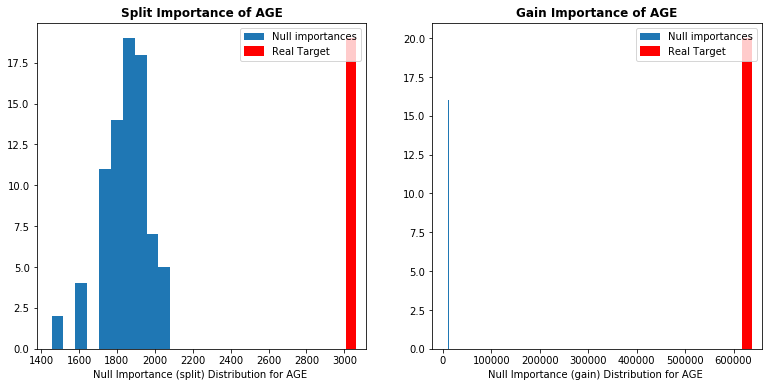

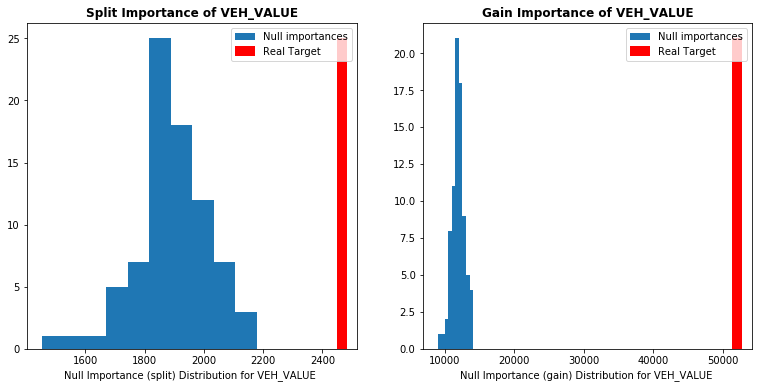

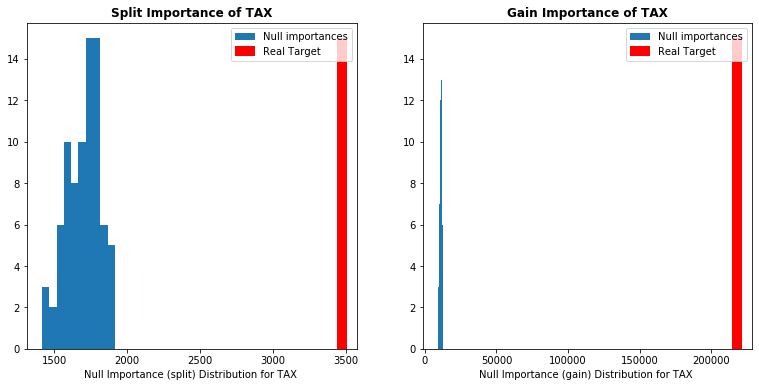

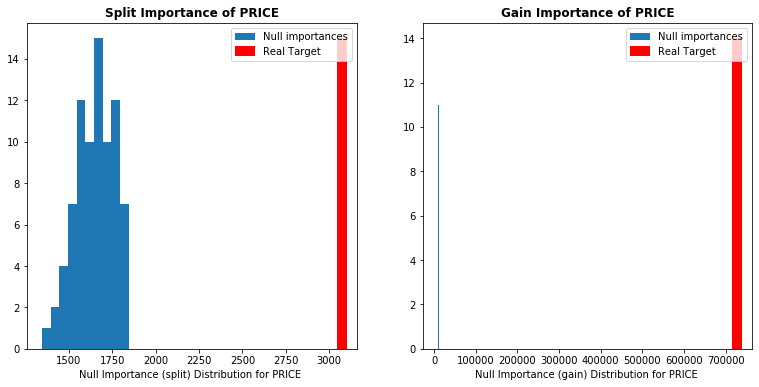

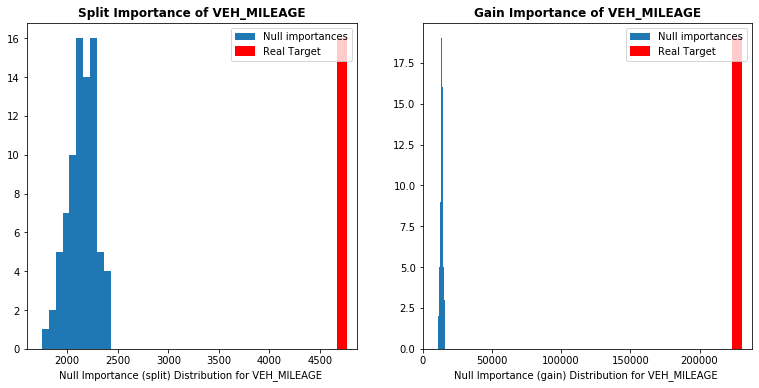

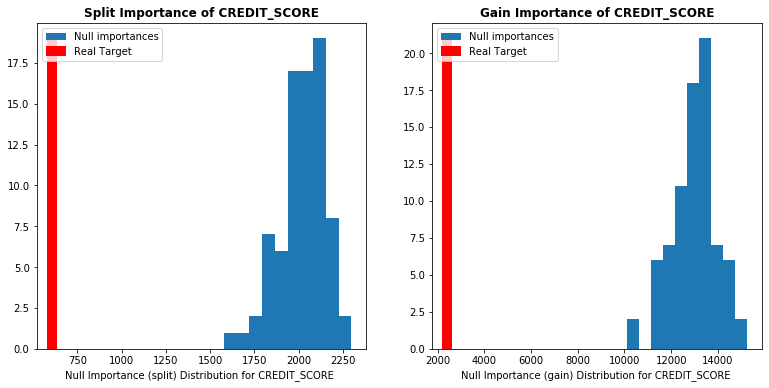

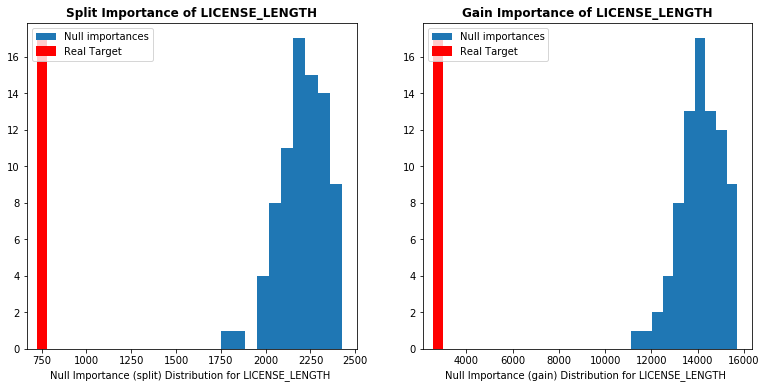

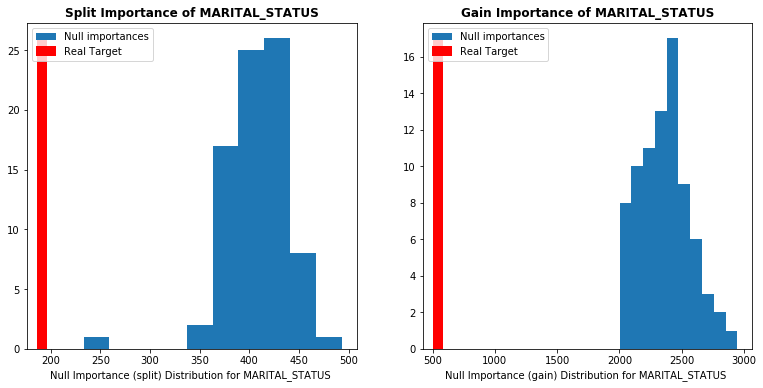

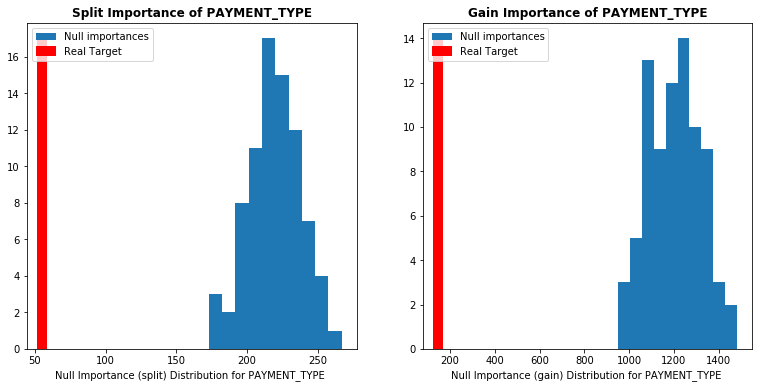

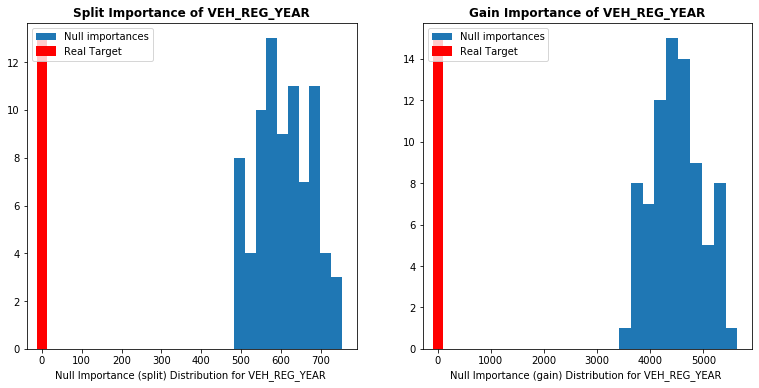

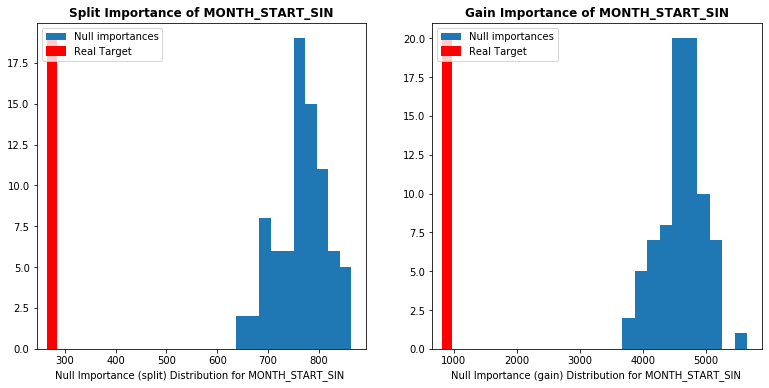

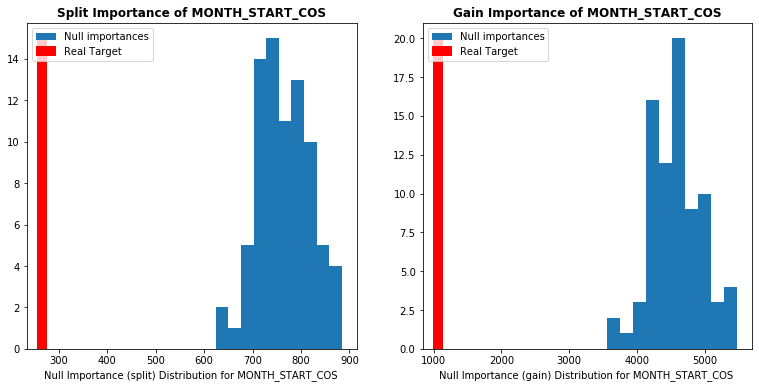

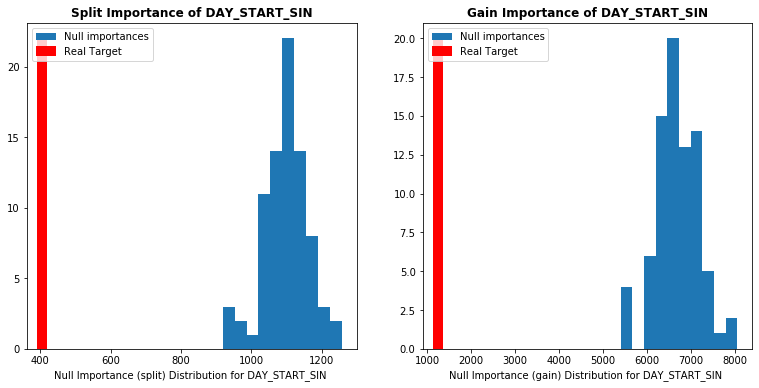

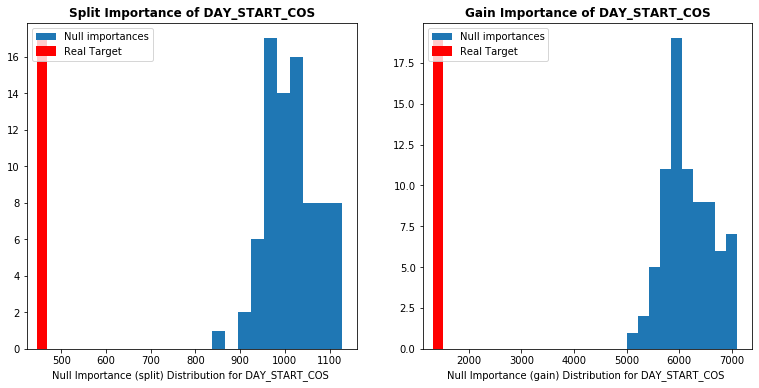

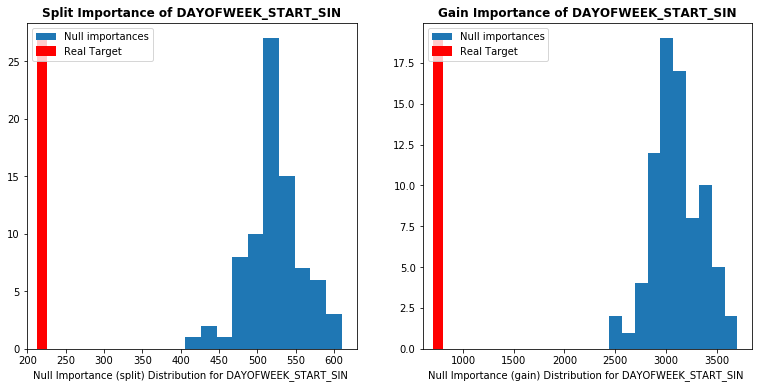

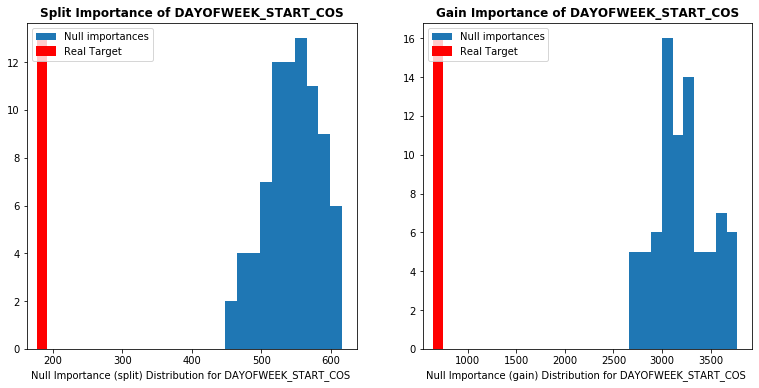

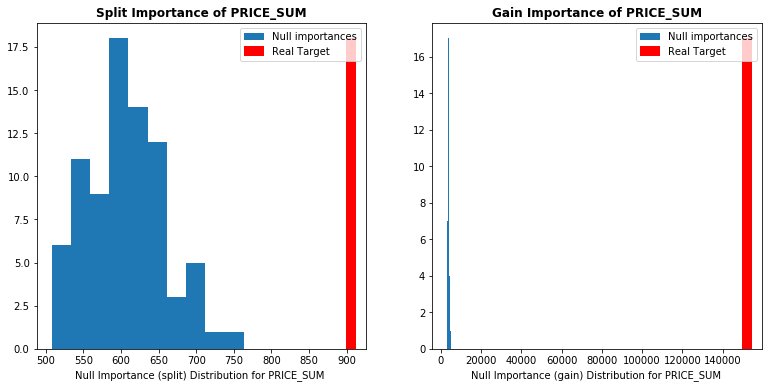

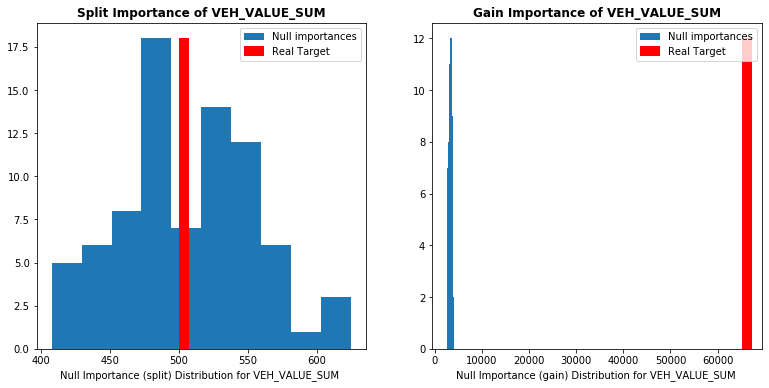

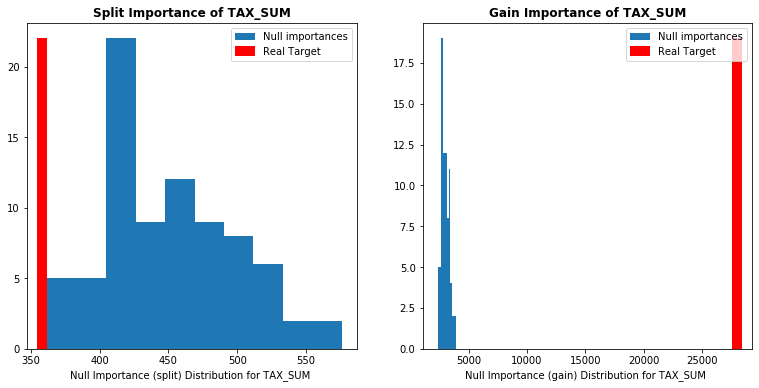

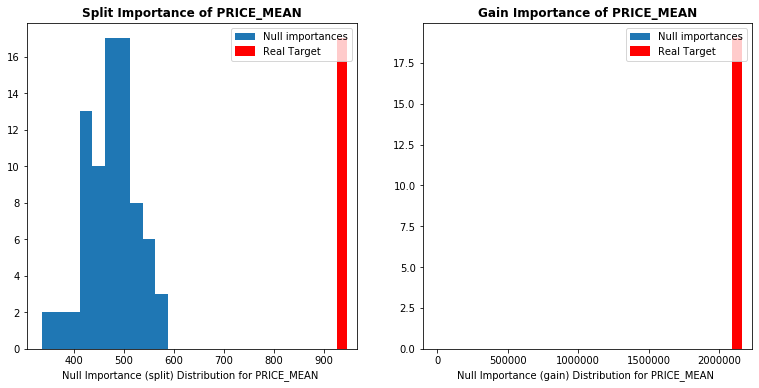

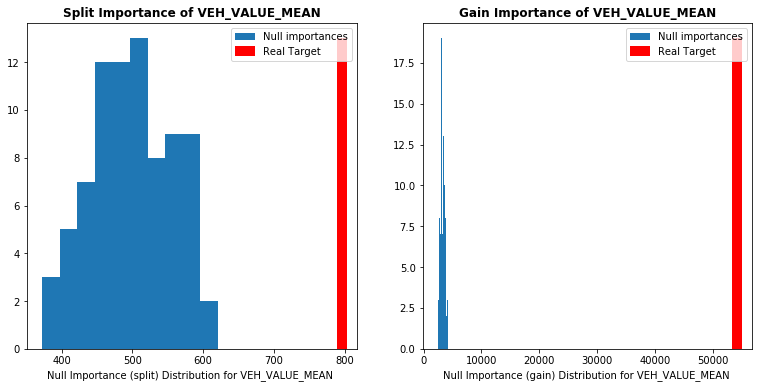

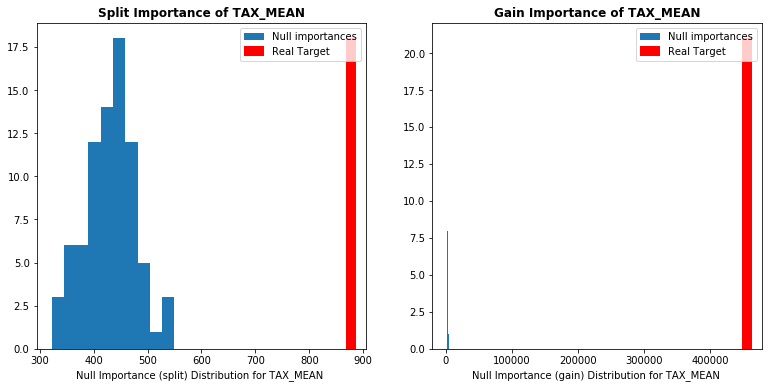

In [283]:
for feat in modelling_df.columns.values:
    display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_=feat)

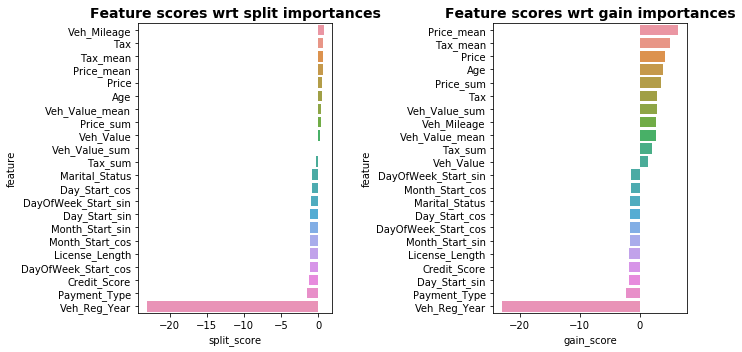

In [284]:
feature_scores = []
for _f in actual_imp_df['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))

scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

In [295]:
non, clf = get_feature_importances(data_x=modelling_df, data_y=target_y, shuffle=True)

/Users/shaun/Repos/venv/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


(<bound method Booster.feature_importance of <lightgbm.basic.Booster object at 0x15db5d978>>,
 Index(['Age', 'Veh_Value', 'Tax', 'Price', 'Veh_Mileage', 'Credit_Score',
        'License_Length', 'Marital_Status', 'Payment_Type', 'Veh_Reg_Year',
        'Month_Start_sin', 'Month_Start_cos', 'Day_Start_sin', 'Day_Start_cos',
        'DayOfWeek_Start_sin', 'DayOfWeek_Start_cos', 'Price_sum',
        'Veh_Value_sum', 'Tax_sum', 'Price_mean', 'Veh_Value_mean', 'Tax_mean'],
       dtype='object'))

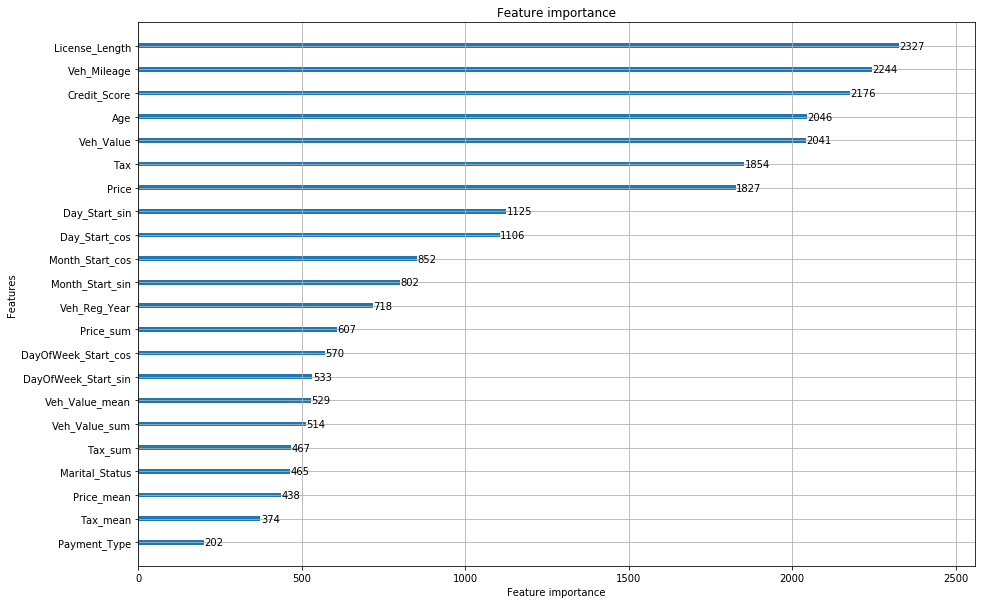

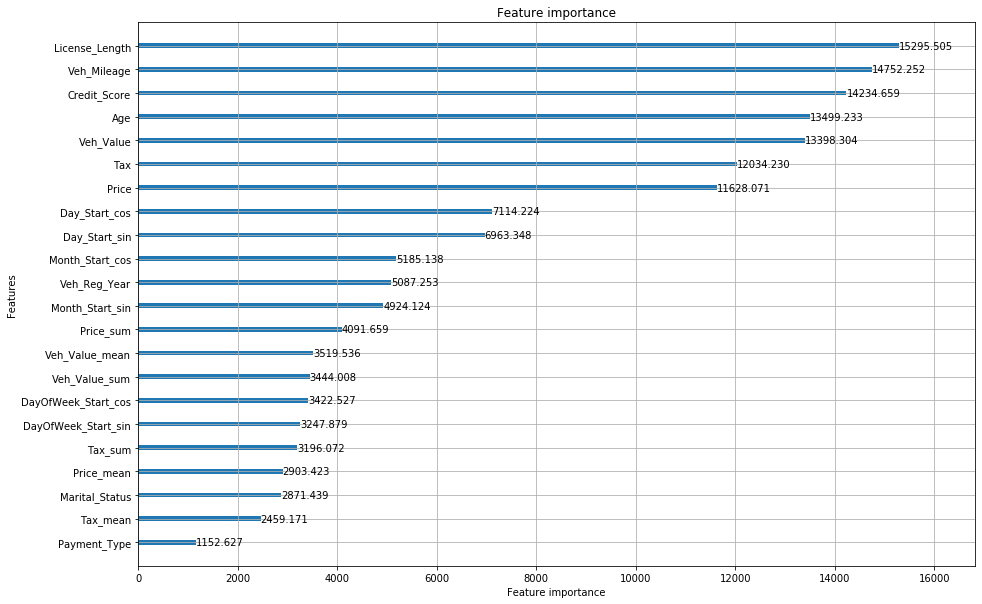

In [310]:
lgb.plot_importance(clf, importance_type='split', figsize=(15,10))
lgb.plot_importance(clf, importance_type='gain', figsize=(15,10))

In [312]:
train_x, test_x, train_y, test_y = train_test_split(modelling_df, target_y, test_size=0.2)

In [313]:
import lightgbm as lgb

train_X, valid_X, train_Y, valid_Y = train_test_split(
        train_x, train_y, test_size=0.33)

train_data = lgb.Dataset(train_X, label=train_Y)
valid_data = lgb.Dataset(valid_X, label=valid_Y)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt'
}

print('Starting training...')
# train
gbm = lgb.train(params,
                train_data,
                num_boost_round=2000,
                valid_sets=valid_data,
                early_stopping_rounds=50,
               )

Starting training...
[1]	valid_0's auc: 0.97167
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.977034
[3]	valid_0's auc: 0.979864
[4]	valid_0's auc: 0.981833
[5]	valid_0's auc: 0.982866
[6]	valid_0's auc: 0.983541
[7]	valid_0's auc: 0.984392
[8]	valid_0's auc: 0.985203
[9]	valid_0's auc: 0.986986
[10]	valid_0's auc: 0.987264
[11]	valid_0's auc: 0.988094
[12]	valid_0's auc: 0.988247
[13]	valid_0's auc: 0.989275
[14]	valid_0's auc: 0.989675
[15]	valid_0's auc: 0.989901
[16]	valid_0's auc: 0.990423
[17]	valid_0's auc: 0.990523
[18]	valid_0's auc: 0.990813
[19]	valid_0's auc: 0.991044
[20]	valid_0's auc: 0.991465
[21]	valid_0's auc: 0.9915
[22]	valid_0's auc: 0.99157
[23]	valid_0's auc: 0.991711
[24]	valid_0's auc: 0.991932
[25]	valid_0's auc: 0.992049
[26]	valid_0's auc: 0.992184
[27]	valid_0's auc: 0.992347
[28]	valid_0's auc: 0.992514
[29]	valid_0's auc: 0.992548
[30]	valid_0's auc: 0.992714
[31]	valid_0's auc: 0.99279
[32]	valid_0's auc: 0.992871
[33]

In [314]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score, accuracy_score

y_prob = gbm.predict(test_x.values, num_iteration=gbm.best_iteration)
y_pred = [round(x) for x in y_prob]

print('Accuracy LGBM:', (accuracy_score(y_pred, test_y)) * 100)
print('AOC ROC:', roc_auc_score(test_y.values, y_prob))
print('Recall score:', recall_score(test_y, y_pred))
print('F1 score:', f1_score(test_y, y_pred))

Accuracy LGBM: 98.1619209519762
AOC ROC: 0.99126157220181
Recall score: 0.9881440948472412
F1 score: 0.9868690702087286


<Figure size 432x288 with 0 Axes>

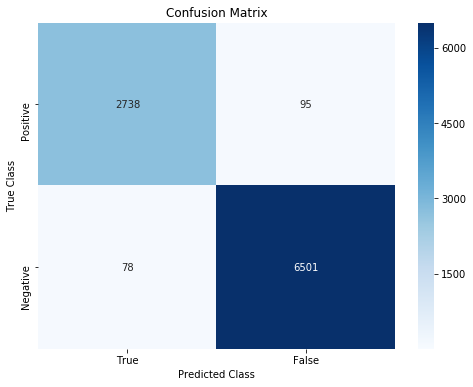

In [315]:
from sklearn.metrics import confusion_matrix
plt.figure()
cm = confusion_matrix(test_y, y_pred)
labels_x = ['True', 'False']
labels_y = ['Positive', 'Negative']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels_x, yticklabels = labels_y, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()